# Linear models (Instructor Notebook)

### What's included in the script:
1. A real-life example: Diabetes Study  
2. Exploratory data analysis, aka EDA. 
3. Fitting a simple linear regression
4. Fitting a multiple linear regression, and refining the model with a simple model selection technique

# 1. A real-life example: Diabetes Study  

**A quick peek to diabetes dataset**

In [3]:
# import image module
from IPython.display import Image
# get the image
Image(url="Diabetes_study.png", width=800, height=300)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# print(diabetes.DESCR)

# Create a Dataframe (combining features and target)
import pandas as pd
df=pd.DataFrame(data=np.c_[diabetes.data, diabetes.target],columns=diabetes.feature_names + ['target'])

# 2. [**Exploratory data analysis**](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

An approach of analyzing data sets to summarize their main characteristics. e.g., data distribution.

In [6]:
# check data distribution (standardized data)
df.describe().applymap("{0:.2f}".format)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


# 3. Fitting a [**Simple linear regression**](https://en.wikipedia.org/wiki/Simple_linear_regression)

Let's pick one feature (say, BMI) to regress on the target variable. 

Also, we can split the data set into training and testing sets, by dropping the last 20 observations for the training set (402 observations for training) and keeping the last 20 observations for the testing set (20 observations for testing)

In [7]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Create and train the linear regression object, and make predictions

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Traing the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Output the estimated linear regression coefficients, the mean squared error, and the coefficient of determination (variance score) to understand model fit

Also plot the prediction outputs to visualize model fit

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


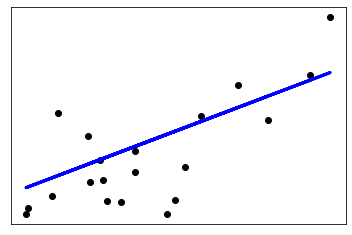

In [10]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue', linewidth = 3)

plt.xticks(())
plt.yticks(())

plt.show()

# 4. Fitting a [**(Multiple) Linear Regression**](https://en.wikipedia.org/wiki/Linear_regression)


While simple linear regression has intuitive illustration, scientists / analysts often have more than one variable that could explain / predict.

In this case, all relevant features are needed to be in the regression analysis.

Before going there, let's consider a random approach to split dataset for train and test. 

In [11]:
# split data into trainning (80%) and testing datasets (20%)
from sklearn import model_selection
x_train, x_test, y_train, y_test =model_selection.train_test_split(df.iloc[0:,0:-1], df.iloc[0:,-1:], test_size=0.2, random_state=123)

In [12]:
# Let's check the portion of data used for training compared to total data.
pd.concat([x_train.count()/(x_train.count()+x_test.count()), y_train.count()/(y_train.count()+y_test.count())])

age       0.798643
sex       0.798643
bmi       0.798643
bp        0.798643
s1        0.798643
s2        0.798643
s3        0.798643
s4        0.798643
s5        0.798643
s6        0.798643
target    0.798643
dtype: float64

**Let's take a look at how each feature is related to the target.**

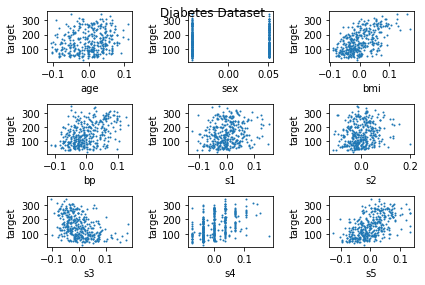

In [13]:
# plot
features = df.columns[0:-1]

fig, axs = plt.subplots(3, 3)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(x_train[feature], y_train['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

In [14]:
# correlationi matrix
df.corr(method='pearson').round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


**Fit the model by including all features/variables**

In [15]:
import statsmodels.api as sm
from scipy import stats

x_train_upd=sm.add_constant(data=x_train)
reg_mdl=sm.OLS(y_train, x_train_upd).fit()
print(reg_mdl.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     34.41
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           4.80e-46
Time:                        01:29:12   Log-Likelihood:                -1908.6
No. Observations:                 353   AIC:                             3839.
Df Residuals:                     342   BIC:                             3882.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.0484      2.920     52.068      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Refine the model by removing non significant variables and the variables that are correlated with other variables.**

In [16]:
x_train2=x_train_upd.drop(['age','s2','s3','s6'], axis=1)
reg_mdl2=sm.OLS(y_train, x_train2).fit()
print(reg_mdl2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     56.59
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.59e-48
Time:                        01:29:15   Log-Likelihood:                -1910.8
No. Observations:                 353   AIC:                             3836.
Df Residuals:                     346   BIC:                             3863.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1429      2.919     52.118      0.0

## **Project**

Logistic regression to predict ability of a person to repay a loan

\~\~\~\~\~\~\~\~\~__You only need to run next cell once__\~\~\~\~\~\~\~\~\~

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~

In this example, students will explore methods of logistic regression, variable selection, and goodness of fit measures. Using the data from social network, students can build different logistic regression models to obtain the best model fit and explore the parameter space to identify drivers affecting the dependent variable.

The model uses data generated by _randomize_features.py_. Please refer to the code for details. 

In [18]:
##
# Importing modules and loading the data
# Note that statsmodels are used for logistic regression instead of sklearn
# The main reason - coefficient significant and testing is not available out of the box for sklearn
# There are minor differences in the model specification between logistic regression on statsmodels/sklearn
# See package documentation for more details
##
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as logit
from sklearn.preprocessing import LabelEncoder as encoder
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/dscamp/dscamp_public/Linear Models/face_data_inf.csv')
RANDOM_SEED = 123

The dataset contains a number of fields randomized to generate social network profile:

- 'face_id'- id assocated with profile picture
- 'age' - age of a person
- 'gender' - gender of a person
- 'relationship' - marital status (single, married)
- 'music_genre' - favourite musical genre (random, pre-defined list)
- 'band' - random band name based on 'music_genre' (random, non-existant)
- 'team' - favourite team (random, from list of teams)
- 'first_name' - random first name
- 'last_name' - random last name (relationship=='married' adopts the name of the partner)
- 'education' - education level (random conditional on age, pre-defined list)
- 'education_prompt' - technical field for web page render
- 'work'- employer name (if any, otherwise 'unemployed'; random conditional on 'education', non-existant)
- 'work_prompt' - technical field for web page render
- 'fav_movie_1' - favourite movie (random based on genre, pre-defined list)
- 'fav_movie_2' - favourite movie (random based on genre, pre-defined list; disjoint genre from 'fav_movie_1')
- 'fav_book_1' - favourite book (random, pre-defined list)
- 'fav_book_2' - favourite book (random, pre-defined list)
- 'fav_book_3' - favourite book (random, pre-defined list)
- 'fav_auth_1' - favourite book's author (conditional of fav_book_1)
- 'fav_auth_2' - favourite book's author (conditional of fav_book_2)
- 'fav_auth_3' - favourite book's author (conditional of fav_book_3)
- 'fav_food_1' - favourite dish (random, pre-defined list)
- 'fav_food_2' - favourite dish (random, pre-defined list)
- 'fav_food_3' - favourite dish (random, pre-defined list)
- 'home_city' - home town (random US town)
- 'home_state' - home state (based on 'home_city')
- 'languages' - number of languages person speaks (random, 1-4)
- 'hogwarts' - hogwarts house (random, pre-defined list)
- 'fav_pet' - favourite pet (random, pre-defined list)
- 'vg_genre' - favourite video game genre (random, pre-defined list)
- 'fav_video_game' - favourite video game (random, based on 'vg_genre')
- 'spouse_id' - 'face_id' of spouse
- 'n_friends' - number of friends in the network (degree of a node in the social network graph)
- 'credit' - randomly generate binary variable, credit worthiness

Most of the features are completely random, thus are not suitable for regression modeling. Two notable distinctions that can be used for example:

- 'n_friends' - if network is generated using 'config' method, then degree distribution follows the Poisson regression specification:

$$
N_i = exp^{-3+0.1 \textbf{age}_i+0.3 \textbf{relationship}_i+0.1 \textbf{education}_i+0.2 \textbf{languages}_i}+\epsilon_i
$$

where regressors are taken from random dataset (education is binary with 1 for \[bachelor, master, doctor\], 0 otherwise) and $\epsilon$ is a random integer between 1 and 5. Note that the actual degree distribution will be slightly different from the equation due to pre-processing to make a proper graph (with removal of parallel edges and self-loops).

- 'credit' - generated with 'generate_infection' function and assumes the following logistic regression specificaiton:

$$
p_i = \frac{1}{1+\exp^{-(-17+0.4 \textbf{age}_i+ 0.1 \textbf{n_friends}_i -1.5 \textbf{work}_i +1 \textbf{state}_i  + 1.5 \epsilon_i)}}
$$

where regressors are taken from the dataset and $\epsilon$ is a standard normal random variable. 'state' is a discretized variable taking value of 2 if 'home_state' is CA, TX, or FL (highly populous), 1 if 'home_state' is NY, PA, IL, OH, GA, NC (medium populous), and 0 otherwise (low density population states). Variable 'credit' takes value 1 if $p_i>0.5$ and 0 otherwise.

Below we consider reproduced model of logistic regression for 'credit variable'.

In [19]:
##
# Generate features from the data
##
work = data['work'] == 'unemployed'
work = [float(i) for i in work]

def discretize_state(row):
    if row['home_state'] in ['CA', 'TX', 'FL']:
        return 2
    else:
        if row['home_state'] in ['NY', 'OH', 'IL', 'PA', 'GA', 'NC']:
            return 1
        else:
            return 0


state = data.apply (lambda row: discretize_state(row), axis=1)
data['state'] = state
data['employment'] = work
X = data[['state', 'employment', 'n_friends', 'age']]
y = data['credit']

The logistic regression aims to capture the relationship between financial reliablity/ability to repay debt and a set of social features. The example is motivated by recent efforts to use social network data to infer credit score. The intuitive explanations for the features are as follows:

- 'age' affects repayment rate with higher age being more financially stable. (Note - restricted attribute)
- 'n_friends' having large node degree suggest higher level of responsibility to meet financial obligations.
- 'employment' being unemployed adversely affect the ability to repay one's loan.
- 'state' suggests higher density areas provide bigger opportunities to meet one's financial obligations.

In [20]:
##
# Split train test into 80/20 ratio.
##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [21]:
##
# Fit logistic regression and provide fit summary.
##
lr = sm.Logit(y_train, sm.add_constant(X_train)).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.146478
         Iterations 10


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 credit   No. Observations:                  800
Model:                          Logit   Df Residuals:                      795
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Apr 2022   Pseudo R-squ.:                  0.7376
Time:                        01:29:47   Log-Likelihood:                -117.18
converged:                       True   LL-Null:                       -446.54
Covariance Type:            nonrobust   LLR p-value:                3.019e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.8898      2.358     -9.707      0.000     -27.511     -18.268
state          1.5745      0.275      5.731      0.000       1.036       2.113
employment    -2.6158      1.158     -2.259      0.024      -4.886      -0.346
n_friends      0.1144      0.075      1.530      0.126      -0.032       0.261
age            0.5407      0.064      8.415      0.000       0.415       0.667
==============================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [22]:
##
# Provide accuracy for the model
##
y_pred = lr.predict(sm.add_constant(X_test)) > 0.5
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

Accuracy: 0.97


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
